In [1]:
#methods and logic of the algo is from the course materials which presented
#on class and uploaded on Canvas for reviewing. I have not and will not copy from internet or classmates' work. 
#I will cite every source.
#I guarantee the code is my own work and I totally understand the code, and it will not be copied by anyone.
#Based on my understanding of the code and lecture material, I can reproduce the code and algo without any help.
#I agree to the terms in Honor Code.
#perceptron helper
#algo and method from PS3_Perceptron.ipynb from class material
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.metrics import accuracy_score
class Perceptron(object):
  def __init__(self, X_train, Y_train, lr, epochs=100, epsilon=1e-5):
    # add one for bias
    self.n, _ = X_train.shape
    self.X_train = np.c_[np.ones(self.n), X_train]
    _, self.d = self.X_train.shape
    self.W = [[1],[0],[1]]
    #self.W = np.random.random((self.d, 1))
    #W will relate to our learning rate, for better observation
    #of the perceptron, i set the W to 1 0 1 instead of random and 0 0 0
    #However, the learning rate is not necessary for our model
    self.epochs, self.lr, self.epsilon = epochs, lr, epsilon
    self.y_true = Y_train

  def activation_fn(self, x):
    return 2*(x>0)-1

  def predict(self, x):
    z = x.dot(self.W)
    a = self.activation_fn(z)
    return a

  def seq_fit(self, verbose=False, plot=False):
    """
    Sequential Perceptron algorithm.
    """
    error_list = []
    for epoch in range(self.epochs):
      if np.all([np.squeeze(self.predict(self.X_train)) == np.squeeze(self.y_true)]):
        break
      for i in range(self.n):
        y_pred = self.predict(self.X_train[i])
        if y_pred != self.y_true[i]:
          self.W = self.W + self.lr*(self.y_true[i] * self.X_train[i].reshape([self.d,1]))
      err = self.error()
      error_list.append(self.error())

      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.W))
        self.plot(self.W[1], self.W[2], self.W[0], epoch)

    return self.W, error_list, epoch+1

  def batch_fit(self, verbose=False, plot=False):
    """
    Batch Perceptron algorithm.
    """
    error_list = []
    for epoch in range(self.epochs):
      y_pred = self.predict(self.X_train)
      if np.any([np.squeeze(y_pred) != np.squeeze(self.y_true)]):
        update = np.sum(self.y_true[np.squeeze(y_pred) != np.squeeze(self.y_true)]
                                          * self.X_train[np.squeeze(y_pred) != np.squeeze(self.y_true)], axis=0).reshape([self.d,1])
        self.W += self.lr * update
        err = self.error()
        error_list.append(err)
      else:
        break

      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.W))
        self.plot(self.W[1], self.W[2], self.W[0], epoch)

    return self.W, error_list, epoch+1

  def error(self, X_test=None, y_test=None):
    """
    Used to calculate the residual sum of squares (RSS) error.
    If X_test and y_test are not given, returns the training RSS,
    otherwise test RSS.
    """
    if X_test is None:
      diff = self.y_true-self.predict(self.X_train)
    else:
      diff = y_test-self.predict(X_test)
    return (diff.T@diff)[0,0]

  def plot(self, a, b, bias, epoch):
    y = self.y_true.reshape(len(self.y_true),)
    plt.plot(self.X_train[:, 1][y == -1], self.X_train[:, 2][y == -1], 'yo')
    plt.plot(self.X_train[:, 1][y ==  1], self.X_train[:, 2][y ==  1], 'ro')

    xx = np.linspace(-1,11,5000)
    yy = (a*xx + bias)/(-1*b)
    plt.plot(xx, yy,'b')
    plt.title("epoch "+str(epoch))
    plt.xlim(np.min(self.X_train[:, 1])-1, np.max(self.X_train[:, 1])+1)
    plt.ylim(np.min(self.X_train[:, 2])-1, np.max(self.X_train[:, 2])+1)
    plt.show()



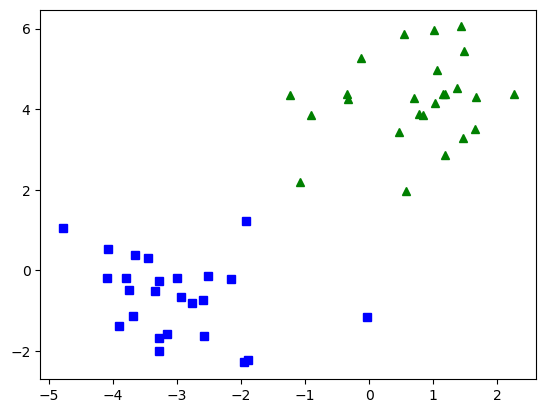

In [6]:
#a1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = datasets.make_blobs(n_samples=50, centers=2, n_features=2, center_box=(-4, 4), cluster_std=1, random_state=1247)
ori_X = X
ori_y = y
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()
y = y*2-1
y = y.reshape(50,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=420)


[[ 0.8115716 ]
 [-4.99269831]
 [-6.68623459]]


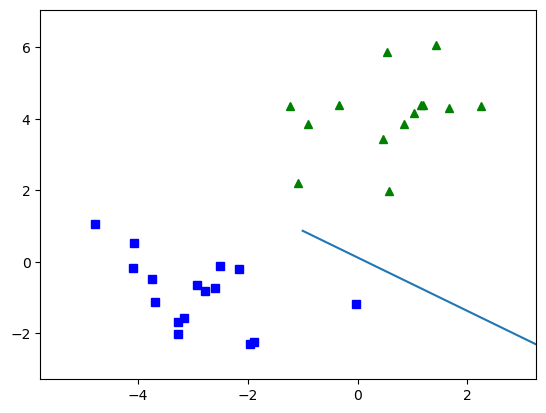

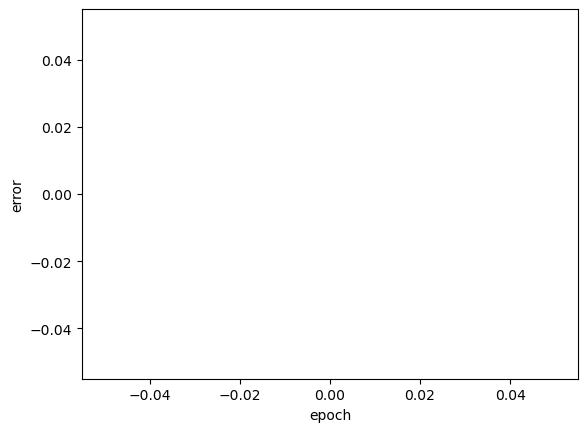

[0]


In [423]:
#a2
perceptron = Perceptron(X_train, y_train, epochs=100,lr=0.1)
w, in_err, converge_iter = perceptron.batch_fit()

y = y_train.reshape(len(y_train),)
plt.plot(X_train[:, 0][y == -1], X_train[:, 1][y == -1], 'g^')
plt.plot(X_train[:, 0][y == 1], X_train[:, 1][y == 1], 'bs')
xx = np.linspace(-1,11)
print(w)
yy = (w[1][0]*xx + w[0][0])/(-1*w[2][0])

plt.plot(xx, yy)
plt.xlim(np.min(X[:, 0])-1, np.max(X[:, 0])+1)
plt.ylim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
plt.show()

plt.plot(in_err)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()
print(in_err)


error plot is empty due to the simple dataset, the model error got to 0 in 1-2 epoch.

In [424]:
#a3
y_pred = []
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
for i in range(len(X_test)):
 y_pred.append(perceptron.predict(X_test[i]))
acc1 = accuracy_score(y_test, y_pred)

print("accuracy is ", acc1)

accuracy is  1.0


[[ 0.18870537]
 [-1.88145345]
 [-2.03980135]]


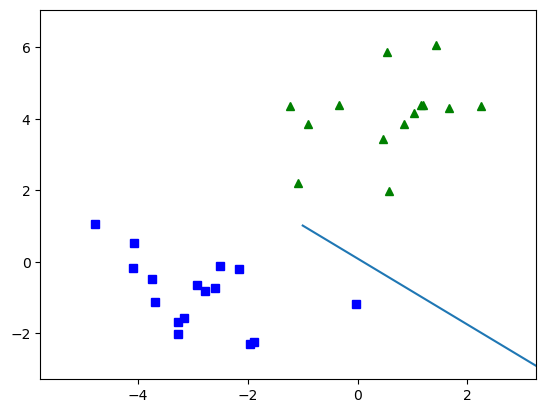

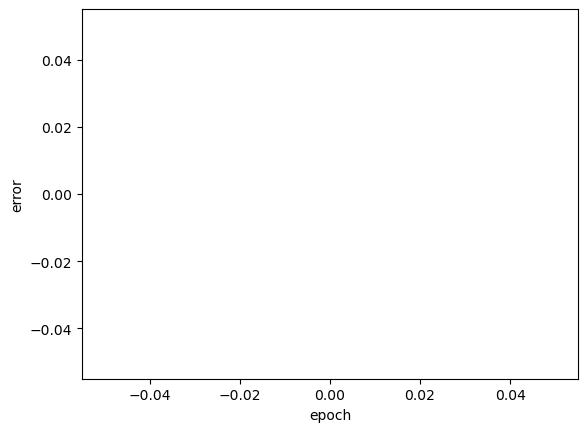

[0]


In [425]:
#a4
perceptron_seq = Perceptron(X_train, y_train,lr=0.5)
w, in_err, converge_iter = perceptron_seq.seq_fit()

y = y_train.reshape(len(y_train),)
plt.plot(X_train[:, 0][y == -1], X_train[:, 1][y == -1], 'g^')
plt.plot(X_train[:, 0][y == 1], X_train[:, 1][y == 1], 'bs')
xx = np.linspace(-1,11)
print(w)
yy = (w[1][0]*xx + w[0][0])/(-1*w[2][0])

plt.plot(xx, yy)
plt.xlim(np.min(X[:, 0])-1, np.max(X[:, 0])+1)
plt.ylim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
plt.show()

plt.plot(in_err)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()
print(in_err)

error plot is empty due to the simple dataset, the model error got to 0 in 1-2 epoch.

In [426]:
#a5
y_pred_2 = []
for i in range(len(X_test)):
 y_pred_2.append(perceptron_seq.predict(X_test[i]))
acc2 = accuracy_score(y_test, y_pred)
print("Accuracy is ", acc2)

Accuracy is  1.0


a6:
Based on my observation, the learning rate does not affect out model here. I think the reason is that out dataset is easy that the model will get convergence under 3 or 5 epochs. However, I tried the extreme examples of learning rate of 5 and 0.001. The model still performs as over or under fitting. Even though the dataset is simple and small, the lr still affects our model's fitting. 
For our perceptron model, the choice of learning rate only affect by our w. But, from the observation, the learning rate is not necessary to get our accurate prediction.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


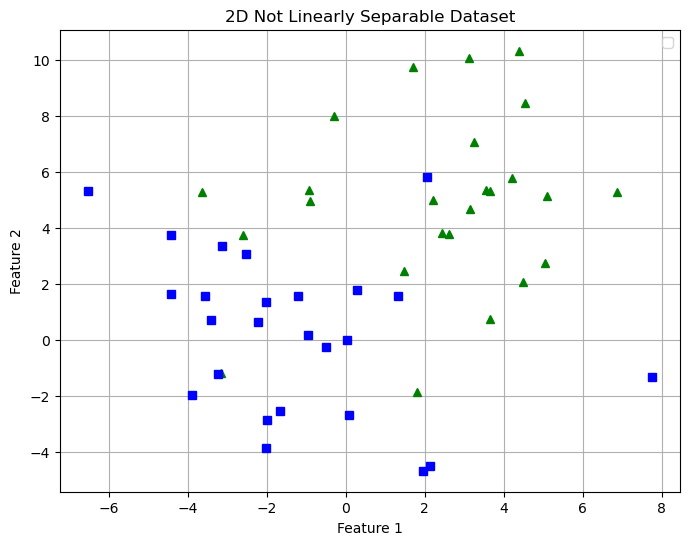

In [467]:
#b1
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=50, centers=2, n_features=2, center_box=(-2, 4), cluster_std=3, random_state=1247)

plt.figure(figsize=(8, 6))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Not Linearly Separable Dataset")
plt.legend()
plt.grid(True)
plt.show()
y = y*2-1
y = y.reshape(50,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=420)

[[10.98959663]
 [-1.7724782 ]
 [-3.68908913]]


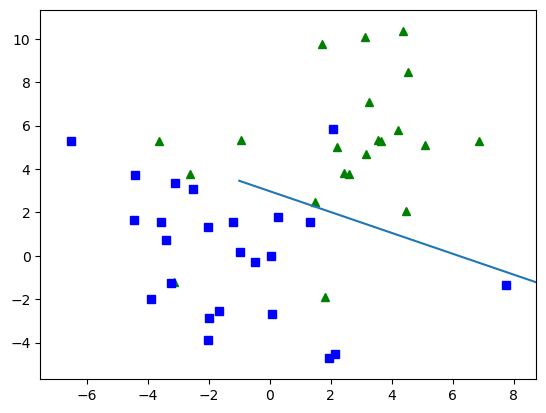

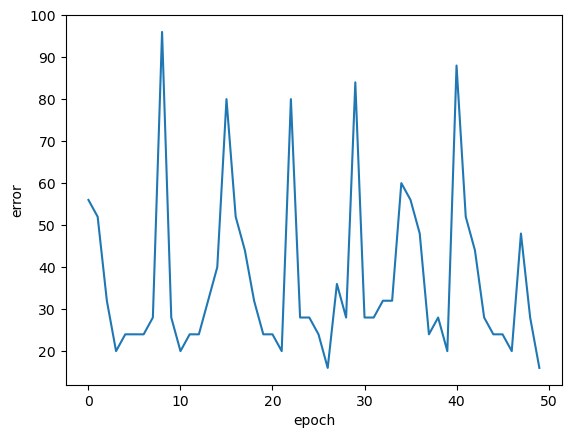

[56, 52, 32, 20, 24, 24, 24, 28, 96, 28, 20, 24, 24, 32, 40, 80, 52, 44, 32, 24, 24, 20, 80, 28, 28, 24, 16, 36, 28, 84, 28, 28, 32, 32, 60, 56, 48, 24, 28, 20, 88, 52, 44, 28, 24, 24, 20, 48, 28, 16]
accuracy is  0.8


In [468]:
#b2
#As instructor mentioned in piazza, we should set our epochs to optimize iteration to get our best result but the error will not be 0 for non-separable.
perceptron = Perceptron(X_train, y_train, epochs=50,lr=0.3)
w, in_err, converge_iter = perceptron.batch_fit()

y = y_train.reshape(len(y_train),)
plt.plot(X_train[:, 0][y == -1], X_train[:, 1][y == -1], 'g^')
plt.plot(X_train[:, 0][y == 1], X_train[:, 1][y == 1], 'bs')
xx = np.linspace(-1,11)
print(w)
yy = (w[1][0]*xx + w[0][0])/(-1*w[2][0])

plt.plot(xx, yy)
plt.xlim(np.min(X[:, 0])-1, np.max(X[:, 0])+1)
plt.ylim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
plt.show()

plt.plot(in_err)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()
print(in_err)

y_pred = []
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
for i in range(len(X_test)):
 y_pred.append(perceptron.predict(X_test[i]))
acc1 = accuracy_score(y_test, y_pred)

print("accuracy is ", acc1)